# Covid Analysis on John Hopkins Dataset

In [0]:
import pandas as pd
import numpy as np
import glob
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
import os

import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

warnings.filterwarnings("ignore")
%matplotlib inline
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data_folder = "drive/My Drive/analysis_data/train"
csv_files = glob.glob(data_folder+"/"+"*.csv")

In [10]:
df = pd.DataFrame()
for c in csv_files:
    d = pd.read_csv(c)
    d["date"] = c.split("/")[-1].split(".")[0]
    df = pd.concat([df,d])
df["date"] = pd.to_datetime(df["date"])
df['Week_Number'] = df['date'].dt.week
df["Month_Number"] = df["date"].dt.month
df = df[df["Country_Region"]=="US"]
df = df.drop(["Country_Region","Lat","Long_","Last_Update"],axis=1)
df = df[df.Province_State != "Recovered"]
print(df.shape)

(2320, 17)


In [11]:
df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,date,Week_Number,Month_Number
0,Alabama,13052,522,NaN,12530.0,1.0,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860,2020-05-20,21,5
1,Alaska,401,10,352.0,39.0,2.0,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN,2020-05-20,21,5
2,American Samoa,0,0,NaN,0.0,60.0,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN,2020-05-20,21,5
3,Arizona,14906,747,3773.0,10386.0,4.0,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005,2020-05-20,21,5
4,Arkansas,5003,107,3852.0,1044.0,5.0,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584,2020-05-20,21,5


In [44]:
df[["Confirmed","Deaths","Recovered","Active","Incident_Rate","People_Tested","People_Hospitalized","Mortality_Rate","Testing_Rate","Hospitalization_Rate"]].iloc[:,:].corr().style.background_gradient(cmap='Blues').format("{:.3f}")

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
Confirmed,1.000,0.983,0.876,0.987,0.794,0.819,0.983,0.320,0.371,0.188
Deaths,0.983,1.000,0.874,0.958,0.782,0.758,0.988,0.346,0.374,0.198
Recovered,0.876,0.874,1.000,0.810,0.703,0.907,0.942,0.331,0.381,0.241
Active,0.987,0.958,0.810,1.000,0.782,0.802,0.964,0.306,0.335,0.176
Incident_Rate,0.794,0.782,0.703,0.782,1.000,0.557,0.784,0.312,0.614,0.077
People_Tested,0.819,0.758,0.907,0.802,0.557,1.000,0.876,0.214,0.377,0.183
People_Hospitalized,0.983,0.988,0.942,0.964,0.784,0.876,1.000,0.458,0.363,0.256
Mortality_Rate,0.320,0.346,0.331,0.306,0.312,0.214,0.458,1.000,0.098,0.487
Testing_Rate,0.371,0.374,0.381,0.335,0.614,0.377,0.363,0.098,1.000,-0.130
Hospitalization_Rate,0.188,0.198,0.241,0.176,0.077,0.183,0.256,0.487,-0.130,1.000


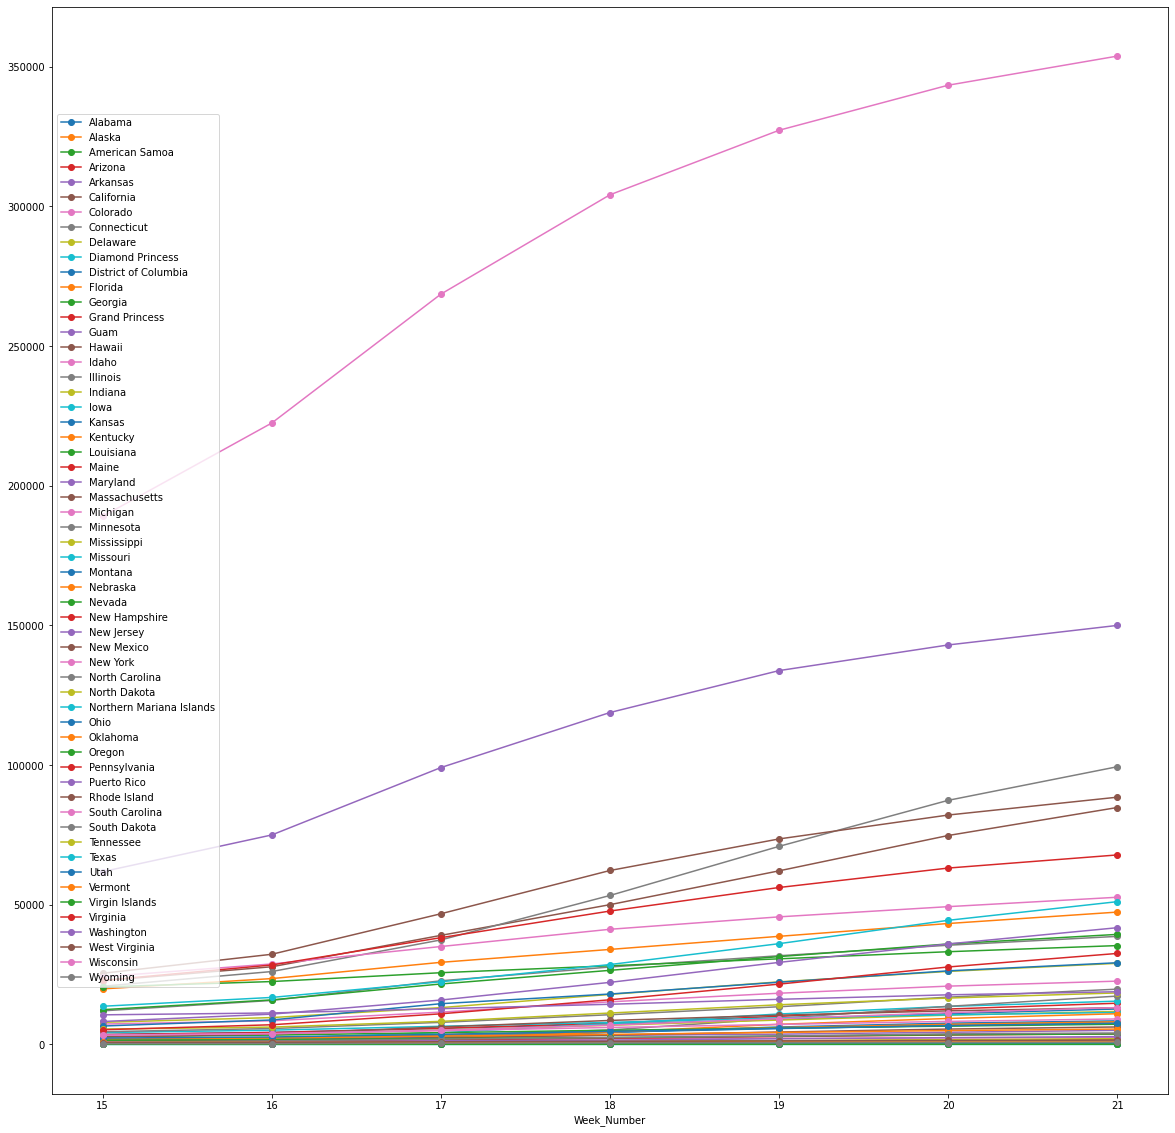

In [13]:
df.groupby(["Province_State","Week_Number"])["Confirmed"].mean().unstack('Province_State', fill_value=0).plot(linestyle='-', marker='o',figsize=(20,20))
plt.legend(loc="center left")
plt.show()

In [14]:
april_stats = df[df["Month_Number"]==4].sort_values("date").groupby("Province_State").last()
fig = make_subplots(rows=2, cols=2, start_cell="bottom-left", \
                    subplot_titles=("Recovered", "Deaths", "Active", "Confirmed"),horizontal_spacing = 0.2)

x1 = april_stats[["Active"]].sort_values("Active").index[-10:]
y1 = april_stats["Active"].sort_values().values[-10:]
x2 = april_stats[["Confirmed"]].sort_values("Confirmed").index[-10:]
y2 = april_stats["Confirmed"].sort_values().values[-10:]
x3 = april_stats[["Deaths"]].sort_values("Deaths").index[-10:]
y3 = april_stats["Deaths"].sort_values().values[-10:]
x4 = april_stats[["Recovered"]].sort_values("Recovered").index[-10:]
y4 = april_stats["Recovered"].sort_values().values[-10:]

fig.add_trace(go.Bar(
            x=y4,
            y=x4,
            orientation ="h",
            name="Recovered",
            marker_color='rgb(0, 255, 0)'),row=1, col=1)
            
fig.add_trace(go.Bar(
            x=y3,
            y=x3,
            orientation ="h",
            name="Deaths",
            marker_color='rgb(255, 0, 0)'),row=1, col=2)

fig.add_trace(go.Bar(
            x=y1,
            y=x1,
            orientation ="h",
            name="Active Cases",
            marker_color='rgb(55, 83, 109)'),row=2, col=1)

fig.add_trace(go.Bar(
            x=y2,
            y=x2,
            orientation ="h",
            name="Confirmed Cases"),row=2, col=2)

fig.update_layout(height=600, width=1000, title_text = "Top 10 States statistics for the month of April")

In [15]:
may_stats = df[df["Month_Number"]==5].sort_values("date").groupby("Province_State").last()
fig = make_subplots(rows=2, cols=2, start_cell="bottom-left", \
                    subplot_titles=("Recovered", "Deaths", "Active", "Confirmed"),horizontal_spacing = 0.2)

x1 = may_stats[["Active"]].sort_values("Active").index[-10:]
y1 = may_stats["Active"].sort_values().values[-10:]
x2 = may_stats[["Confirmed"]].sort_values("Confirmed").index[-10:]
y2 = may_stats["Confirmed"].sort_values().values[-10:]
x3 = may_stats[["Deaths"]].sort_values("Deaths").index[-10:]
y3 = may_stats["Deaths"].sort_values().values[-10:]
x4 = may_stats[["Recovered"]].sort_values("Recovered").index[-10:]
y4 = may_stats["Recovered"].sort_values().values[-10:]

fig.add_trace(go.Bar(
            x=y4,
            y=x4,
            orientation ="h",
            name="Recovered",
            marker_color='rgb(0, 255, 0)'),row=1, col=1)
            
fig.add_trace(go.Bar(
            x=y3,
            y=x3,
            orientation ="h",
            name="Deaths",
            marker_color='rgb(255, 0, 0)'),row=1, col=2)

fig.add_trace(go.Bar(
            x=y1,
            y=x1,
            orientation ="h",
            name="Active Cases",
            marker_color='rgb(55, 83, 109)'),row=2, col=1)

fig.add_trace(go.Bar(
            x=y2,
            y=x2,
            orientation ="h",
            name="Confirmed Cases"),row=2, col=2)

fig.update_layout(height=600, width=1000, title_text = "Top 10 States statistics for the month of April")

In [0]:
df = df.reset_index(drop=True)

In [0]:
# Assign regions
north_east = "Maine, Massachusetts, Rhode Island, Connecticut, New Hampshire, Vermont, New York, Pennsylvania, New Jersey, Delaware, Maryland"
south_east = "West Virginia, Virginia, Kentucky, Tennessee, North Carolina, South Carolina, Georgia, Alabama, Mississippi, Arkansas, Louisiana, Florida"
mid_west = "Ohio, Indiana, Michigan, Illinois, Missouri, Wisconsin, Minnesota, Iowa, Kansas, Nebraska, South Dakota, North Dakota"
south_west = "Texas, Oklahoma, New Mexico, Arizona"
west = "Colorado, Wyoming, Montana, Idaho, Washington, Oregon, Utah, Nevada, California, Alaska, Hawaii"

north_east = north_east.split(", ")
south_east = south_east.split(", ")
mid_west = mid_west.split(", ")
south_west = south_west.split(", ")
west = west.split(", ")

province_states = list(df["Province_State"].unique())

territories = list(set(province_states) - set(north_east).union(set(south_east)).union(set(mid_west)).union(set(south_west)).union(set(west)))

In [0]:
def assign_region(state):
    if state in north_east:
        return "northeast"
    elif state in south_east:
        return "southeast"
    elif state in mid_west:
        return "midwest"
    elif state in south_west:
        return "southwest"
    elif state in west:
        return "west"
    elif state in territories:
        return "territory"

In [0]:
df["region"] = df["Province_State"].apply(assign_region)

In [20]:
df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,date,Week_Number,Month_Number,region
0,Alabama,13052,522,NaN,12530.0,1.0,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860,2020-05-20,21,5,southeast
1,Alaska,401,10,352.0,39.0,2.0,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN,2020-05-20,21,5,west
2,American Samoa,0,0,NaN,0.0,60.0,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN,2020-05-20,21,5,territory
3,Arizona,14906,747,3773.0,10386.0,4.0,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005,2020-05-20,21,5,southwest
4,Arkansas,5003,107,3852.0,1044.0,5.0,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584,2020-05-20,21,5,southeast


In [21]:
region_rate = df[~df["Incident_Rate"].isnull()].groupby(["date","region"])["Incident_Rate"].sum().unstack().reset_index()
fig = make_subplots(rows=3, cols=2, start_cell="bottom-left",\
                    subplot_titles=("North East", "South East", "MidWest", "SouthWest","West","Territories"),horizontal_spacing = 0.05)

fig.add_trace(go.Scatter(x = region_rate['date'], y = region_rate['northeast'], name="northeast"), row=1, col=1)
fig.add_trace(go.Scatter(x = region_rate['date'], y = region_rate['southeast'], name="southeast"), row=1, col=2)
fig.add_trace(go.Scatter(x = region_rate['date'], y = region_rate['midwest'], name="midwest"), row=2, col=1)
fig.add_trace(go.Scatter(x = region_rate['date'], y = region_rate['southwest'], name="southwest"), row=2, col=2)
fig.add_trace(go.Scatter(x = region_rate['date'], y = region_rate['west'], name="west"), row=3, col=1)
fig.add_trace(go.Scatter(x = region_rate['date'], y = region_rate['territory'], name="territories"), row=3, col=2)

fig.update_layout(height=600, width=1000, title_text = "Regionwise trend in incident rate")
fig.show()

In [22]:
region_rate = df[~df["Mortality_Rate"].isnull()].groupby(["date","region"])["Mortality_Rate"].sum().unstack().reset_index()
fig = make_subplots(rows=3, cols=2, start_cell="bottom-left",\
                    subplot_titles=("North East", "South East", "MidWest", "SouthWest","West","Territories"),horizontal_spacing = 0.05)

fig.add_trace(go.Scatter(x = region_rate['date'], y = region_rate['northeast'], name="northeast"), row=1, col=1)
fig.add_trace(go.Scatter(x = region_rate['date'], y = region_rate['southeast'], name="southeast"), row=1, col=2)
fig.add_trace(go.Scatter(x = region_rate['date'], y = region_rate['midwest'], name="midwest"), row=2, col=1)
fig.add_trace(go.Scatter(x = region_rate['date'], y = region_rate['southwest'], name="southwest"), row=2, col=2)
fig.add_trace(go.Scatter(x = region_rate['date'], y = region_rate['west'], name="west"), row=3, col=1)
fig.add_trace(go.Scatter(x = region_rate['date'], y = region_rate['territory'], name="territories"), row=3, col=2)

fig.update_layout(height=600, width=1000, title_text = "Regionwise trend in mortality rate")
fig.show()

In [23]:
df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,date,Week_Number,Month_Number,region
0,Alabama,13052,522,NaN,12530.0,1.0,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860,2020-05-20,21,5,southeast
1,Alaska,401,10,352.0,39.0,2.0,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN,2020-05-20,21,5,west
2,American Samoa,0,0,NaN,0.0,60.0,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN,2020-05-20,21,5,territory
3,Arizona,14906,747,3773.0,10386.0,4.0,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005,2020-05-20,21,5,southwest
4,Arkansas,5003,107,3852.0,1044.0,5.0,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584,2020-05-20,21,5,southeast


In [0]:
population = pd.read_csv("/content/population_2020.csv")

In [26]:
state_wise = pd.merge(df.groupby("Province_State")[["People_Tested","Confirmed","Active","Recovered","Deaths"]].last().reset_index(),population[["State","Pop"]], \
        left_on="Province_State",right_on="State", how="left").drop("State",axis=1)

state_wise.loc[state_wise["Province_State"]=="American Samoa","Pop"] = 55191
state_wise.loc[state_wise["Province_State"]=="Guam","Pop"] = 168775
state_wise.loc[state_wise["Province_State"]=="Northern Mariana Islands","Pop"] = 57559
state_wise.loc[state_wise["Province_State"]=="Virgin Islands","Pop"] = 104425

state_wise

,Province_State,People_Tested,Confirmed,Active,Recovered,Deaths,Pop
0,Alabama,109516.0,8691,8348.0,0.0,343,4908621.0
1,Alaska,23655.0,372,78.0,284.0,10,734002.0
2,American Samoa,83.0,0,0.0,0.0,0,55191.0
3,Arizona,91737.0,9707,7588.0,1693.0,426,7378494.0
4,Arkansas,59003.0,3611,1415.0,2109.0,87,3038999.0
5,California,809036.0,60616,58152.0,0.0,2464,39937489.0
6,Colorado,85976.0,17832,14112.0,2801.0,919,5845526.0
7,Connecticut,111447.0,30995,23931.0,4346.0,2718,3563077.0
8,Delaware,26468.0,5778,3577.0,2008.0,193,982895.0
9,Diamond Princess,NaN,49,49.0,0.0,0,NaN


In [27]:
death_trend = df.groupby(["date","region"])["Deaths"].sum().unstack().diff().reset_index()
fig = make_subplots(rows=3, cols=2, start_cell="bottom-left",\
                    subplot_titles=("North East", "South East", "MidWest", "SouthWest","West","Territories"),horizontal_spacing = 0.05)

fig.add_trace(go.Scatter(x = death_trend['date'], y = death_trend['northeast'], name="northeast", mode="lines+markers"), row=1, col=1)
fig.add_trace(go.Scatter(x = death_trend['date'], y = death_trend['southeast'], name="southeast", mode="lines+markers"), row=1, col=2)
fig.add_trace(go.Scatter(x = death_trend['date'], y = death_trend['midwest'], name="midwest", mode="lines+markers"), row=2, col=1)
fig.add_trace(go.Scatter(x = death_trend['date'], y = death_trend['southwest'], name="southwest", mode="lines+markers"), row=2, col=2)
fig.add_trace(go.Scatter(x = death_trend['date'], y = death_trend['west'], name="west", mode="lines+markers"), row=3, col=1)
fig.add_trace(go.Scatter(x = death_trend['date'], y = death_trend['territory'], name="territories", mode="lines+markers"), row=3, col=2)

fig.update_layout(height=600, width=1000, title_text = "Regionwise trend in daily deaths")
fig.show()

In [28]:
df["WeekDay"] = df["date"].dt.day_name()
df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,date,Week_Number,Month_Number,region,WeekDay
0,Alabama,13052,522,NaN,12530.0,1.0,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860,2020-05-20,21,5,southeast,Wednesday
1,Alaska,401,10,352.0,39.0,2.0,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN,2020-05-20,21,5,west,Wednesday
2,American Samoa,0,0,NaN,0.0,60.0,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN,2020-05-20,21,5,territory,Wednesday
3,Arizona,14906,747,3773.0,10386.0,4.0,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005,2020-05-20,21,5,southwest,Wednesday
4,Arkansas,5003,107,3852.0,1044.0,5.0,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584,2020-05-20,21,5,southeast,Wednesday


In [29]:
ts = df.copy()
ts.index = ts["date"]
ts.index = ts.index.rename("ds")
ts.head()

,Province_State,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,date,Week_Number,Month_Number,region,WeekDay
ds,,,,,,,,,,,,,,,,,,,
2020-05-20,Alabama,13052,522,NaN,12530.0,1.0,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860,2020-05-20,21,5,southeast,Wednesday
2020-05-20,Alaska,401,10,352.0,39.0,2.0,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN,2020-05-20,21,5,west,Wednesday
2020-05-20,American Samoa,0,0,NaN,0.0,60.0,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN,2020-05-20,21,5,territory,Wednesday
2020-05-20,Arizona,14906,747,3773.0,10386.0,4.0,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005,2020-05-20,21,5,southwest,Wednesday
2020-05-20,Arkansas,5003,107,3852.0,1044.0,5.0,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584,2020-05-20,21,5,southeast,Wednesday


In [30]:
ts_pivot = pd.pivot_table(ts[["Province_State","Confirmed"]], index="ds", columns="Province_State", values="Confirmed")
ts_pivot.head()

Province_State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,District of Columbia,Florida,Georgia,Grand Princess,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Northern Mariana Islands,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
ds,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-12,3563,272,0,3542,1280,22795,7307,12035,1625,49,1875,19895,12452,103,133,499,1407,20852,7928,1587,1344,1963,20595,633,8225,25475,24244,1621,2781,4269,387,791,2836,929,61850,1245,189033,4570,308,11,6604,1970,1527,22938,897,2665,3320,730,5508,13677,2303,727,51,5274,10609,593,3341,270
2020-04-13,3734,277,0,3705,1410,23931,7691,13381,1758,49,1955,21019,13315,103,133,504,1426,22025,8359,1710,1390,2018,21016,698,8936,26867,25635,1621,2942,4515,394,814,2990,985,64584,1262,195749,4886,331,11,6975,2069,1584,24292,903,2665,3391,868,5610,14275,2363,748,51,5747,10635,611,3428,275
2020-04-14,3953,285,0,3809,1498,25356,7950,13989,1926,49,2058,21628,14578,103,133,511,1464,23248,8527,1899,1441,2048,21518,735,9472,28164,27001,1695,3087,4746,399,897,3134,922,68824,1345,203020,5113,341,11,7285,2184,1633,25465,923,3251,3553,988,5827,15006,2417,752,51,6182,10799,640,3555,282
2020-04-15,4075,293,0,3964,1569,26686,7956,14755,2014,49,2197,22511,14987,103,135,524,1473,24593,8960,1995,1504,2210,21951,770,10032,29918,28059,1809,3360,4791,404,901,3211,1139,71030,1484,214454,5340,365,13,7794,2263,1663,26753,974,3251,3656,1168,5827,15907,2548,759,51,6500,10942,702,3721,287
2020-04-16,4345,300,0,4237,1620,27677,8286,15884,2070,49,2350,23343,15669,103,135,530,1587,25734,9542,2141,1615,2435,22532,796,10784,32181,28809,1809,3624,5174,415,952,3214,1139,75317,1484,223691,5639,393,13,8414,2357,1736,28258,1043,3529,3931,1311,6375,16876,2683,774,51,6889,11057,728,3875,296


In [0]:
ts_pivot_reg = pd.pivot_table(ts[["region","Confirmed"]],index="ds", columns="region", values="Confirmed", aggfunc=sum)

In [39]:
ts_pivot_reg.head()

region,midwest,northeast,southeast,southwest,territory,west
ds,,,,,,
2020-04-12,73619,326135,81794,20434,3119,50212
2020-04-13,77671,340663,85699,21311,3205,52070
2020-04-14,81623,356520,89625,22344,3328,54230
2020-04-15,85660,374875,92688,23618,3522,55987
2020-04-16,89769,394423,97130,24954,3744,57781


In [0]:
regions = list(ts_pivot_reg.columns)
futures = []
forecasts = []
models = []

In [71]:
for r in regions: 
  train_dataset= ts_pivot_reg[r].diff().reset_index()
  train_dataset.columns = ["ds","y"]
  prophet_basic = Prophet()
  prophet_basic.fit(train_dataset)
  models.append(prophet_basic)
  future = prophet_basic.make_future_dataframe(periods=15)
  futures.append(future)
  forecast = prophet_basic.predict(future)
  forecasts.append(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

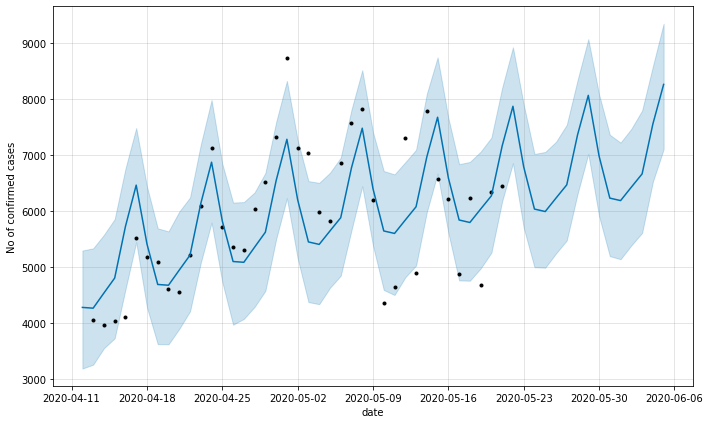

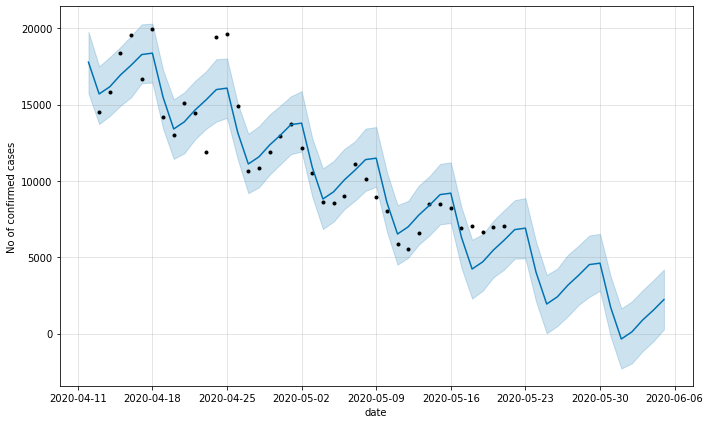

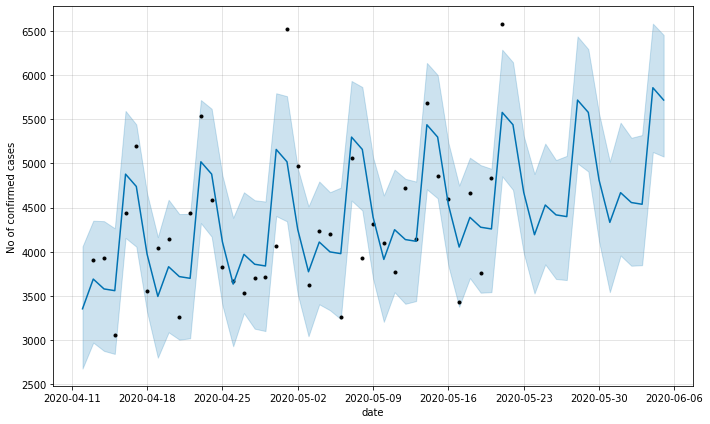

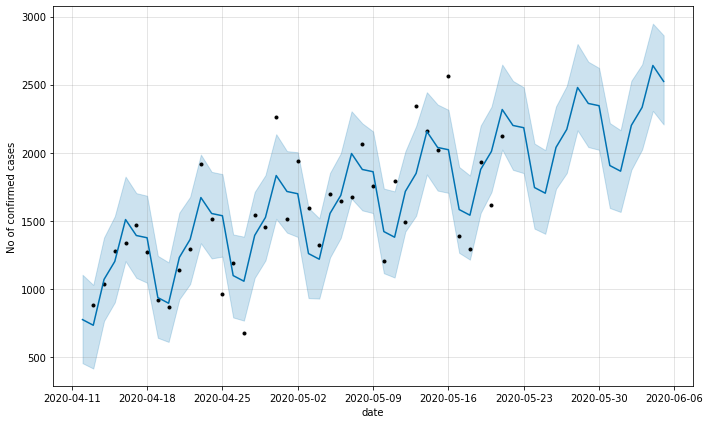

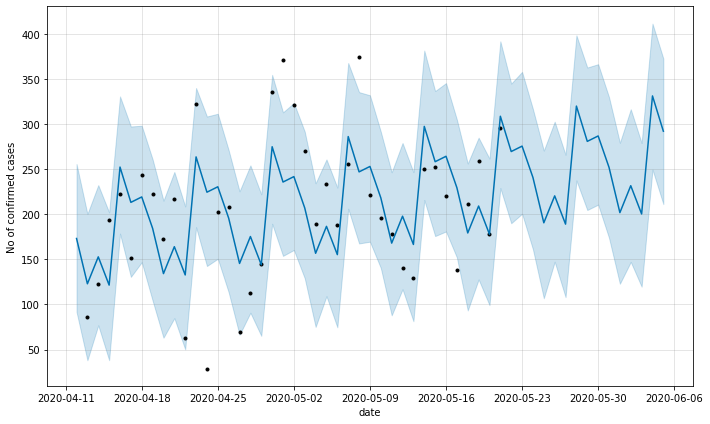

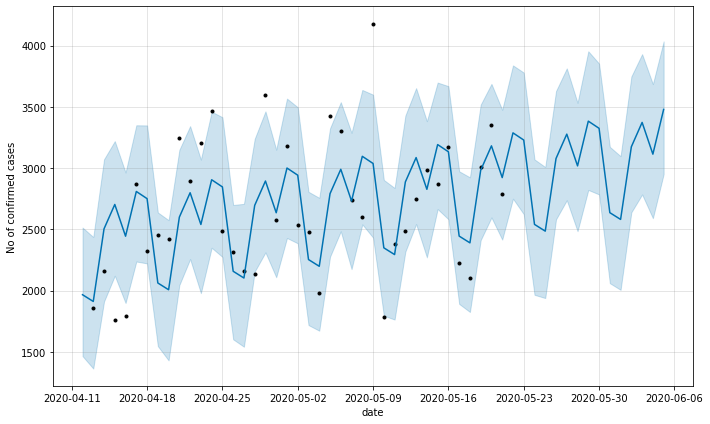

In [81]:
for i in range(len(regions)):
  model = models[i]
  title = "Forecasting number of confirmed cases in the region "+regions[i]
  model.plot(forecasts[i],xlabel="date",ylabel="No of confirmed cases")

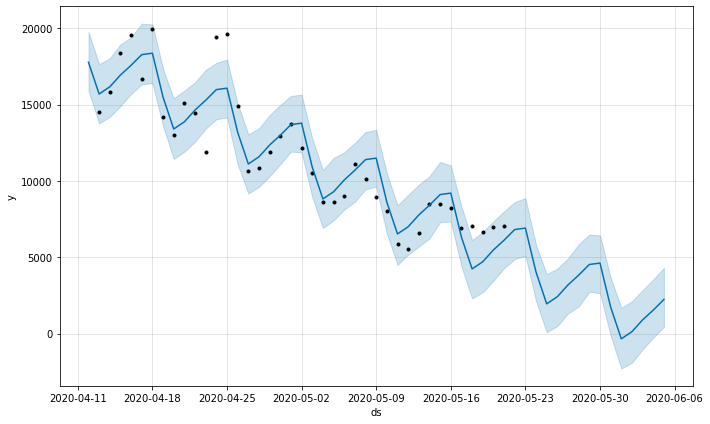

In [56]:
fig1 = prophet_basic.plot(forecast)

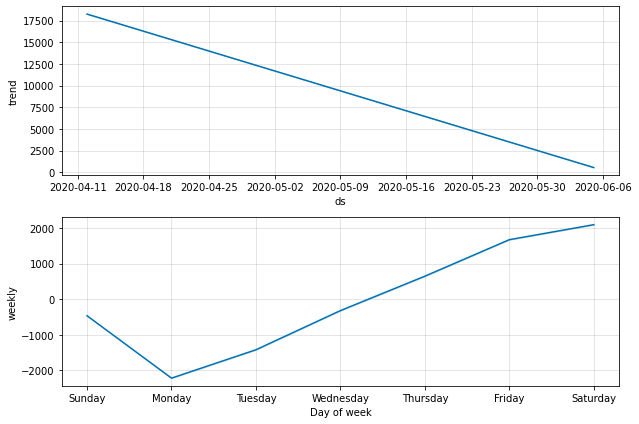

In [57]:
fig2 = prophet_basic.plot_components(forecast)

In [58]:
metric_df = forecast.set_index('ds')[['yhat']].join(train_dataset.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)
print(r2_score(metric_df.y, metric_df.yhat))
print(mean_squared_error(metric_df.y, metric_df.yhat))
print(mean_absolute_error(metric_df.y, metric_df.yhat))

0.8706704369534
2280665.9762735064
1189.1002943862647
